In [1]:
from trainer import SSMTrainer
import torch as T
import numpy as np

T.set_float32_matmul_precision('high')

device = T.device("cuda" if T.cuda.is_available() else "cpu")
ssm_trainer = SSMTrainer(
    env='CartPole-v1',
    embedding_size=64,
    state_space_size=256,
    reward_threshold=15,
    reward_target=475,
    lr=5e-4,
    cf= 0.02,
    gamma=0.95,
    entropy_coefficient=0.02,
    validation_length=100,
    max_episode_time=500,
    strict_mode=True,
    dir='cartpole_ssm_only',
    device=device
    )

In [2]:
#with T.autograd.set_detect_anomaly(True):
ssm_trainer.train()

Episode 1: Reward = 26.0 | Validation Avg = 23.00 from 1 episodes 
Episode 2: Reward = 13.0
Episode 3: Reward = 17.0 | Validation Avg = 9.00 from 1 episodes 
Episode 4: Reward = 18.0 | Validation Avg = 9.00 from 1 episodes 
Episode 5: Reward = 21.0 | Validation Avg = 10.00 from 1 episodes 
Episode 6: Reward = 14.0
Episode 7: Reward = 23.0 | Validation Avg = 10.00 from 1 episodes 
Episode 8: Reward = 36.0 | Validation Avg = 9.00 from 1 episodes 
Episode 9: Reward = 18.0 | Validation Avg = 9.00 from 1 episodes 
Episode 10: Reward = 11.0
Episode 11: Reward = 17.0 | Validation Avg = 11.00 from 1 episodes 
Episode 12: Reward = 18.0 | Validation Avg = 9.00 from 1 episodes 
Episode 13: Reward = 23.0 | Validation Avg = 10.00 from 1 episodes 
Episode 14: Reward = 30.0 | Validation Avg = 21.00 from 1 episodes 
Episode 15: Reward = 33.0 | Validation Avg = 42.00 from 1 episodes 
Episode 16: Reward = 17.0 | Validation Avg = 20.00 from 1 episodes 
Episode 17: Reward = 31.0 | Validation Avg = 20.00 f

In [3]:
ssm_trainer.replay_live()

Live Replay Episode Reward: 500.0


In [4]:
df = ssm_trainer.compile_data()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,recurrent_block.real_transition_matrix,recurrent_block.img_transition_matrix,recurrent_block.real_hidden_matrix,recurrent_block.img_hidden_matrix,recurrent_block.embedding_layer.weight,recurrent_block.output_gate.weight,recurrent_block.input_gate.0.weight,recurrent_block.input_gate.1.smoothness,recurrent_block.discretization_matrix.0.weight,recurrent_block.discretization_matrix.1.smoothness,...,inverse_curiosity.0.bias,inverse_curiosity.2.weight,inverse_curiosity.2.bias,training_steps,training_reward,validation_reward,loss,validation_episodes,curiosity_loss,exploration_signal_bonus
0,8.931517e-08,0.000002,0.000003,0.000002,0.004887,0.000174,0.002989,0.000008,2.588328e-07,9.028301e-08,...,1.306455,1.070672,1.565736,26,26.0,23.0,0.446315,1,0.587188,0.018146
1,1.826358e-07,0.000003,0.000014,0.000007,0.006348,0.000916,0.008270,0.000068,1.304154e-06,5.266679e-08,...,0.831518,0.877785,0.996203,39,13.0,13.0,0.089835,0,0.273252,0.015592
2,5.924025e-06,0.000102,0.000220,0.000119,0.056807,0.018645,0.170080,0.001663,5.852751e-05,1.318216e-05,...,0.617359,0.633383,0.740906,56,17.0,9.0,-0.134218,1,0.225087,0.010284
3,1.449782e-06,0.000025,0.000064,0.000035,0.020997,0.005562,0.042573,0.001510,1.233304e-05,7.655050e-06,...,0.303023,0.288786,0.364251,74,18.0,9.0,0.837040,1,0.147542,0.006943
4,1.066404e-06,0.000018,0.000047,0.000027,0.040587,0.003425,0.010661,0.000344,3.588084e-06,3.492513e-06,...,0.354786,0.332185,0.427324,95,21.0,10.0,-0.575604,1,0.121676,0.004917


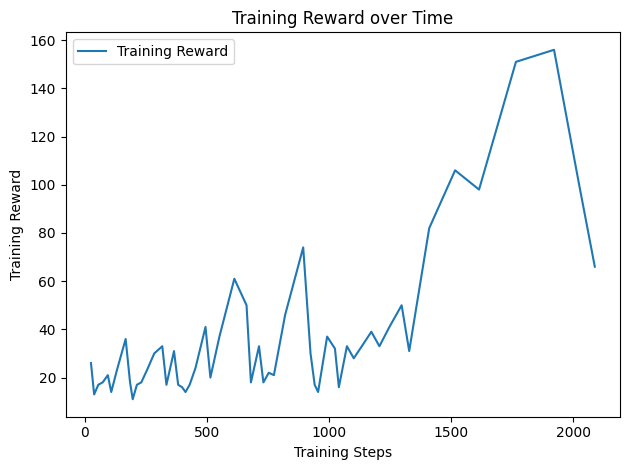

In [6]:
plt.plot(df['training_steps'], df['training_reward'], label='Training Reward', color='tab:blue')
plt.xlabel('Training Steps')
plt.ylabel('Training Reward')
plt.title('Training Reward over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

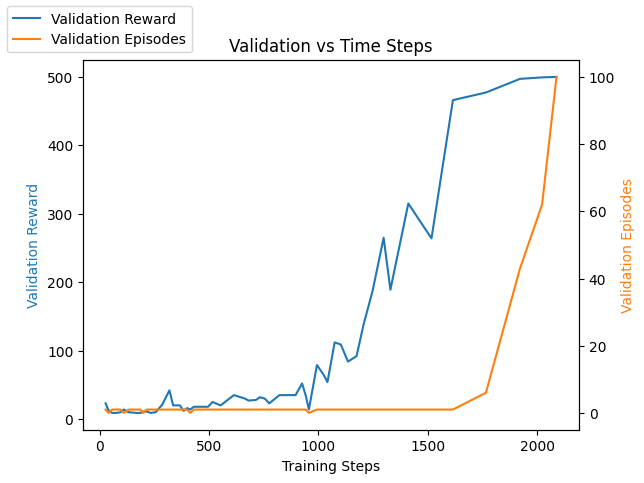

In [7]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['training_steps'], df['validation_reward'], label='Validation Reward', color='tab:blue')
ax2.plot(df['training_steps'], df['validation_episodes'], label='Validation Episodes', color='tab:orange')

ax1.set_xlabel('Training Steps')
ax1.set_ylabel('Validation Reward', color='tab:blue')
ax2.set_ylabel('Validation Episodes', color='tab:orange')

fig.legend(loc='upper left')
plt.title('Validation vs Time Steps')
plt.show()


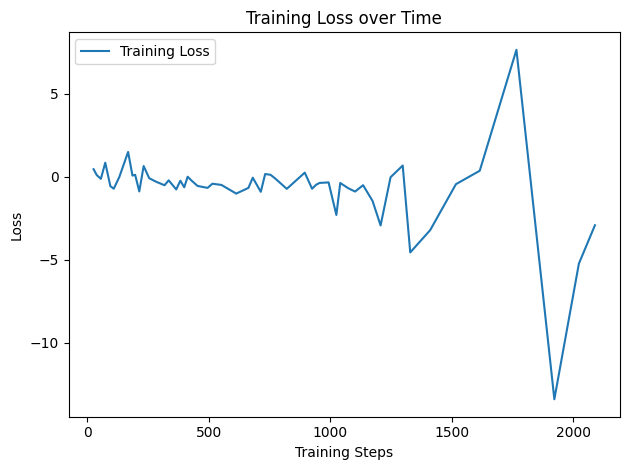

In [8]:
plt.plot(df['training_steps'], df['loss'], label='Training Loss', color='tab:blue')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

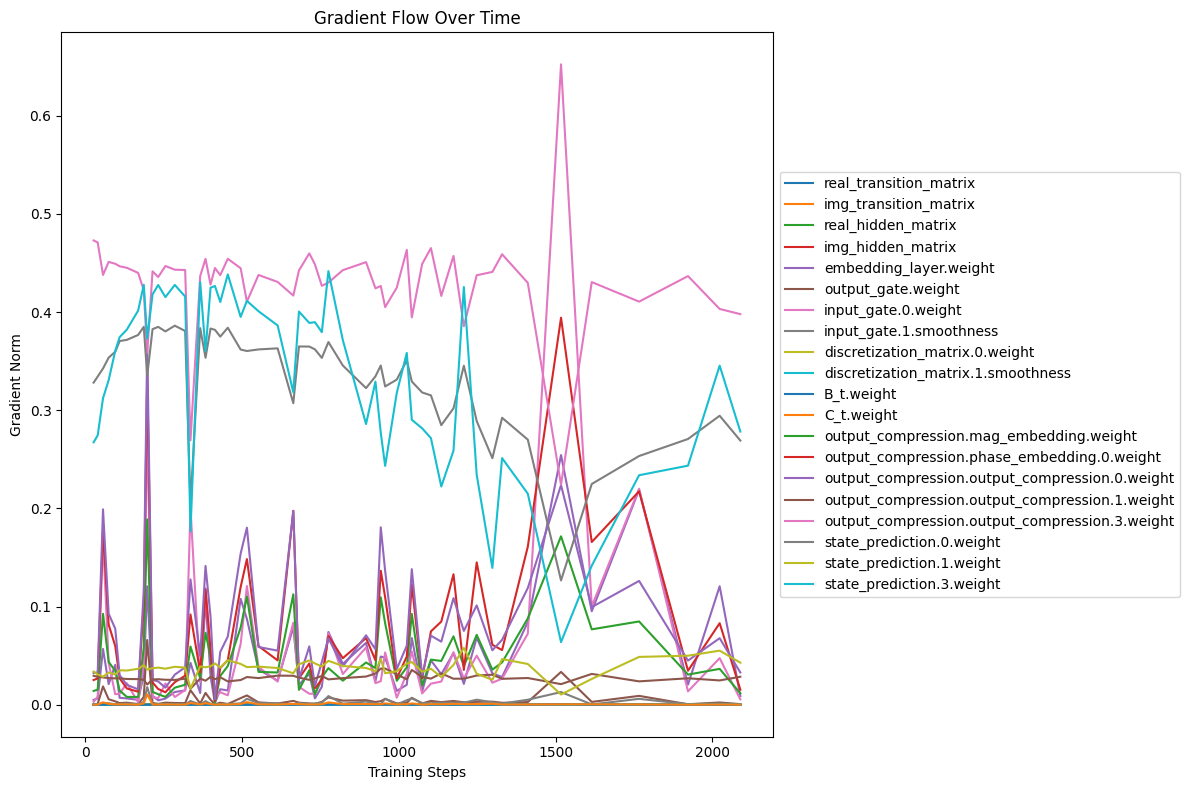

In [9]:
plt.figure(figsize=(12, 8))  # Wider plot for clarity

for gradient in ssm_trainer.ssm_gradient_data.keys():
    if 'bias' not in gradient:
        plt.plot(df['training_steps'], df[gradient], label=gradient.removeprefix('recurrent_block.'))

plt.xlabel('Training Steps')
plt.ylabel('Gradient Norm')
plt.title('Gradient Flow Over Time')

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


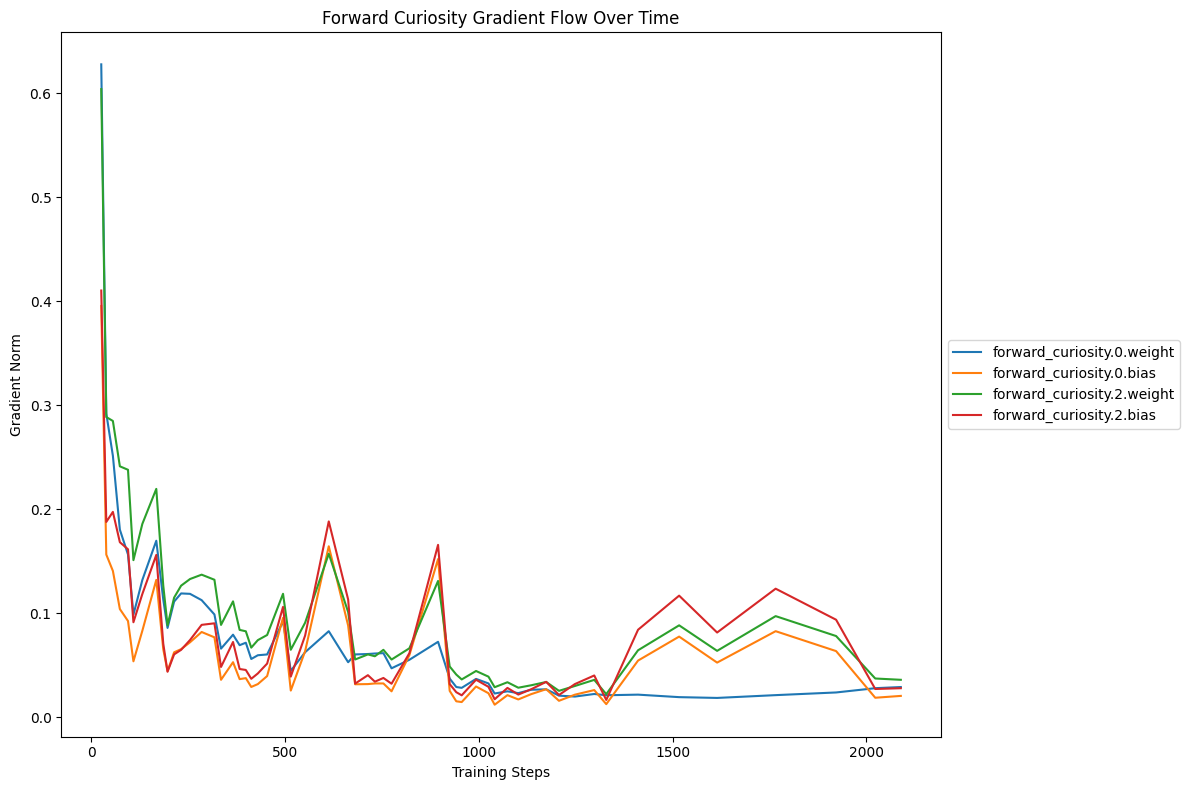

In [10]:
plt.figure(figsize=(12, 8))  # Wider plot for clarity

for gradient in ssm_trainer.curiosity_gradient_data.keys():
    if 'forward' in gradient:
        plt.plot(df['training_steps'], df[gradient], label=gradient.removeprefix('recurrent_block.'))

plt.xlabel('Training Steps')
plt.ylabel('Gradient Norm')
plt.title('Forward Curiosity Gradient Flow Over Time')

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

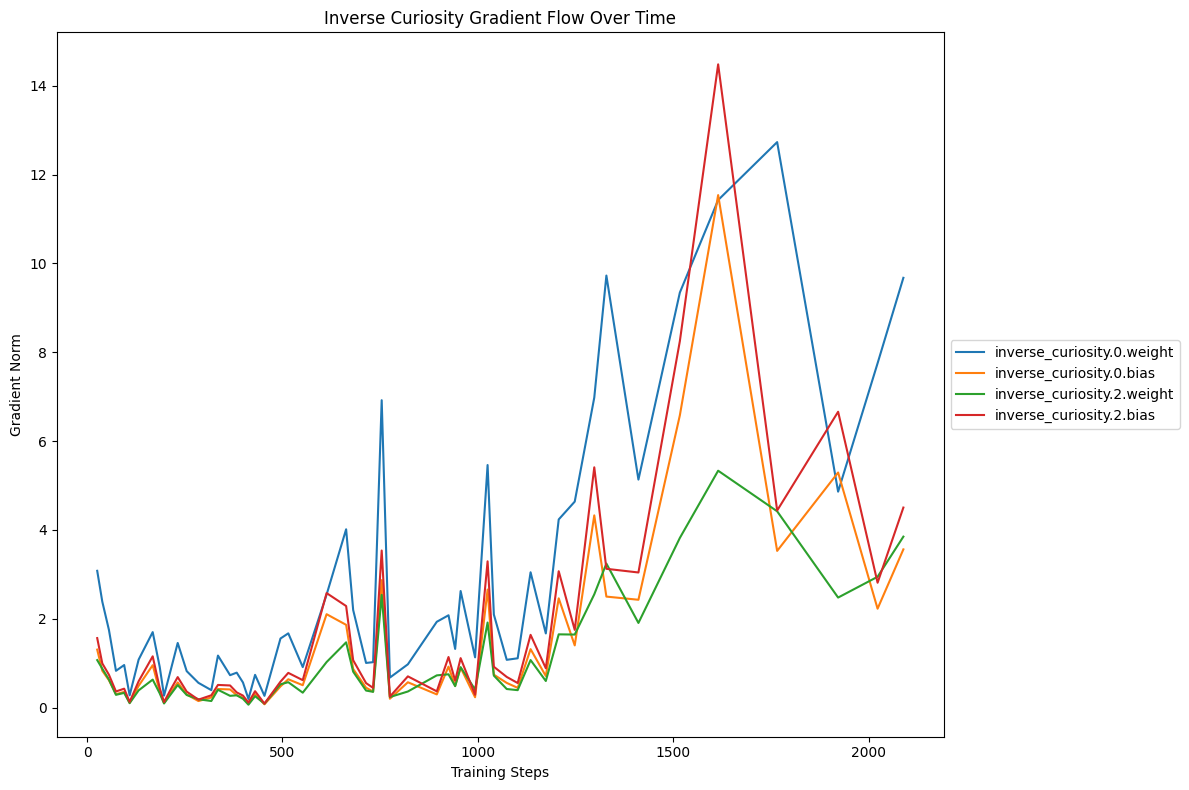

In [11]:
plt.figure(figsize=(12, 8))  # Wider plot for clarity

for gradient in ssm_trainer.curiosity_gradient_data.keys():
    if 'inverse' in gradient:
        plt.plot(df['training_steps'], df[gradient], label=gradient.removeprefix('recurrent_block.'))

plt.xlabel('Training Steps')
plt.ylabel('Gradient Norm')
plt.title('Inverse Curiosity Gradient Flow Over Time')

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

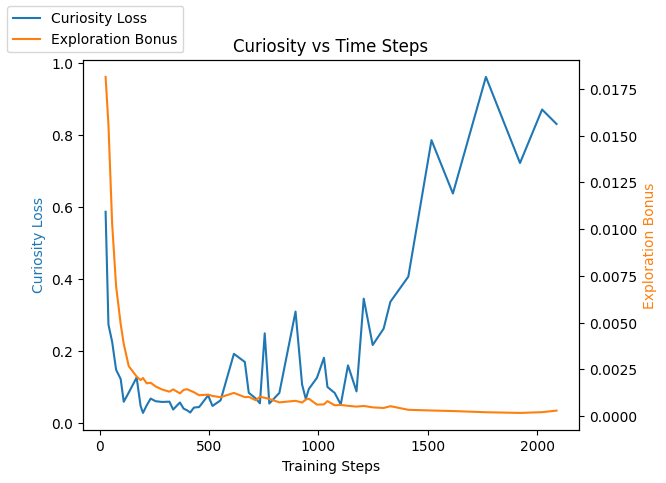

In [12]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['training_steps'], df['curiosity_loss'], label='Curiosity Loss', color='tab:blue')
ax2.plot(df['training_steps'], df['exploration_signal_bonus'], label='Exploration Bonus', color='tab:orange')

ax1.set_xlabel('Training Steps')
ax1.set_ylabel('Curiosity Loss', color='tab:blue')
ax2.set_ylabel('Exploration Bonus', color='tab:orange')

fig.legend(loc='upper left')
plt.title('Curiosity vs Time Steps')
plt.show()


In [13]:
df['training_steps']

0       26
1       39
2       56
3       74
4       95
5      109
6      132
7      168
8      186
9      197
10     214
11     232
12     255
13     285
14     318
15     335
16     366
17     383
18     399
19     413
20     430
21     454
22     495
23     515
24     552
25     613
26     663
27     681
28     714
29     732
30     754
31     775
32     821
33     895
34     925
35     942
36     956
37     993
38    1025
39    1041
40    1074
41    1102
42    1135
43    1174
44    1207
45    1248
46    1298
47    1329
48    1411
49    1517
50    1615
51    1766
52    1922
53    2023
54    2089
Name: training_steps, dtype: int64